In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from aging.behavior.syllables import relabel_by_usage
from aging.plotting import (
    format_plots,
    PlotConfig,
    save_factory,
    figure,
    legend,
    ONTOGENY_AGE_CMAP,
)

In [2]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "size-across-age", tight_layout=False)

In [3]:
version = 12
df = pd.read_parquet(
    f"/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}/ontogeny_males_syllable_df_v00.parquet"
)
# df, usage_map = relabel_by_usage(df)

In [4]:
target_height = 670

In [5]:
df.head()

,experiment,file,uuid,date,age,syllables,true_depth,session_name,subject_name,timestamps,...,width_mm,width_px,angle,velocity_theta,recon_width,recon_length,recon_height,recon_area,onsets,mouse
0,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,87fbe972-825e-4b62-bb61-b97dcef93748,2023-12-02 09:29:02,12,86,677.0,otgy_12M_01,12M_01_04,0.000000,...,58.839687,35.189972,2.692753,0.0,21.026773,41.215134,41.864784,713.0,True,12M_01_04
1,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,87fbe972-825e-4b62-bb61-b97dcef93748,2023-12-02 09:29:02,12,86,677.0,otgy_12M_01,12M_01_04,0.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12M_01_04
2,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,87fbe972-825e-4b62-bb61-b97dcef93748,2023-12-02 09:29:02,12,86,677.0,otgy_12M_01,12M_01_04,0.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12M_01_04
3,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,87fbe972-825e-4b62-bb61-b97dcef93748,2023-12-02 09:29:02,12,86,677.0,otgy_12M_01,12M_01_04,0.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12M_01_04
4,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,87fbe972-825e-4b62-bb61-b97dcef93748,2023-12-02 09:29:02,12,86,677.0,otgy_12M_01,12M_01_04,0.133333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12M_01_04


In [6]:
scalars = (
    df.groupby(["age", "session_name", "uuid"], sort=False)
    .median(numeric_only=True)
    .reset_index()
)
scalars = scalars[scalars["velocity_2d_mm"] < 5]
# scalars["velocity_3d_mm"] *= 30
scalars = scalars[~scalars['session_name'].str.contains("CRL")]

In [7]:
ratio = (scalars['true_depth'] / 670)

In [8]:
for k in ("width_px", "area_px", "length_px"):
    if 'area' in k:
        scalars[f"rescaled_{k}"] = scalars[k] * ratio ** 2
    else:
        scalars[f"rescaled_{k}"] = scalars[k] * ratio

In [9]:
scalar_keys = [
    "rescaled_area_px",
    "rescaled_width_px",
    "rescaled_length_px",
    "height_ave_mm",
    "velocity_2d_mm",
    "recon_area",
    "recon_width",
    "recon_length",
    "recon_height",
]

In [10]:
variances = scalars.groupby('age').std(numeric_only=True)

In [11]:
means = scalars.groupby('age').mean(numeric_only=True)

In [12]:
variances

,syllables,true_depth,timestamps,raw_timestamps,area_mm,area_px,centroid_x_mm,centroid_x_px,centroid_y_mm,centroid_y_px,...,angle,velocity_theta,recon_width,recon_length,recon_height,recon_area,onsets,rescaled_width_px,rescaled_area_px,rescaled_length_px
age,,,,,,,,,,,,,,,,,,,,,
4,5.519284,2.136001,2.330283,442999.450399,51.388105,31.416490,23.466077,14.460341,23.819595,14.332763,...,3.009096,0.028860,0.243357,0.888946,0.481654,8.294325,0.0,0.519405,31.537836,1.772217
8,2.862837,2.247221,0.165544,443028.176770,33.582962,20.245061,30.870521,19.112126,25.931936,15.367982,...,3.051968,0.049944,0.155755,0.703333,0.733622,7.995572,0.0,0.433506,21.002578,1.105478
12,6.287222,2.028957,0.069872,443024.427510,51.811302,32.011912,21.065326,12.931289,32.636527,19.372130,...,4.284752,0.020931,0.400210,1.494290,1.036043,12.443037,0.0,0.799406,31.472566,1.298621
16,9.548996,2.256241,0.130732,40420.470350,42.898305,25.211687,20.818148,12.962079,16.755341,10.097021,...,3.277756,0.044627,0.384636,1.410352,0.943226,13.742877,0.0,0.669165,27.452439,1.552450
20,6.772186,2.274634,0.111037,40428.617968,54.462528,32.654760,25.177616,15.733445,26.541089,15.778539,...,2.923732,0.046200,0.333794,1.322504,0.911127,13.188221,0.0,0.735207,34.151172,1.415236
24,6.711930,2.113449,0.094029,902251.563046,55.112648,33.691183,26.941180,16.680870,24.053845,14.310096,...,4.160582,0.028855,0.465658,1.149575,0.853809,10.039920,0.0,0.887967,33.885141,1.189348
28,8.686915,2.274634,0.112017,40445.158565,55.994631,34.264109,31.274367,19.247047,34.306349,20.420862,...,2.712107,0.032421,0.445740,2.070339,0.963060,17.538410,0.0,0.803255,34.398164,2.154224
32,6.918574,2.360923,0.102176,40407.135330,31.304811,19.377715,22.284030,13.912287,15.853883,9.540541,...,2.988842,0.028467,0.301258,1.497285,0.482030,14.872654,0.0,0.461413,19.174215,1.143408
36,7.357536,2.334523,0.096267,40391.493622,91.100336,55.239139,27.330823,16.820707,20.403651,12.176587,...,3.275987,0.039553,0.627504,2.068304,1.151412,17.438941,0.0,1.366681,56.388929,2.000282


In [13]:
ex = variances[['rescaled_area_px', 'recon_area']].reset_index().melt(id_vars='age')

/tmp/ipykernel_2530/219446914.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(ylabel="Mouse area (px2; std)", xlabel="", xticklabels=["Original", "Transformed"])


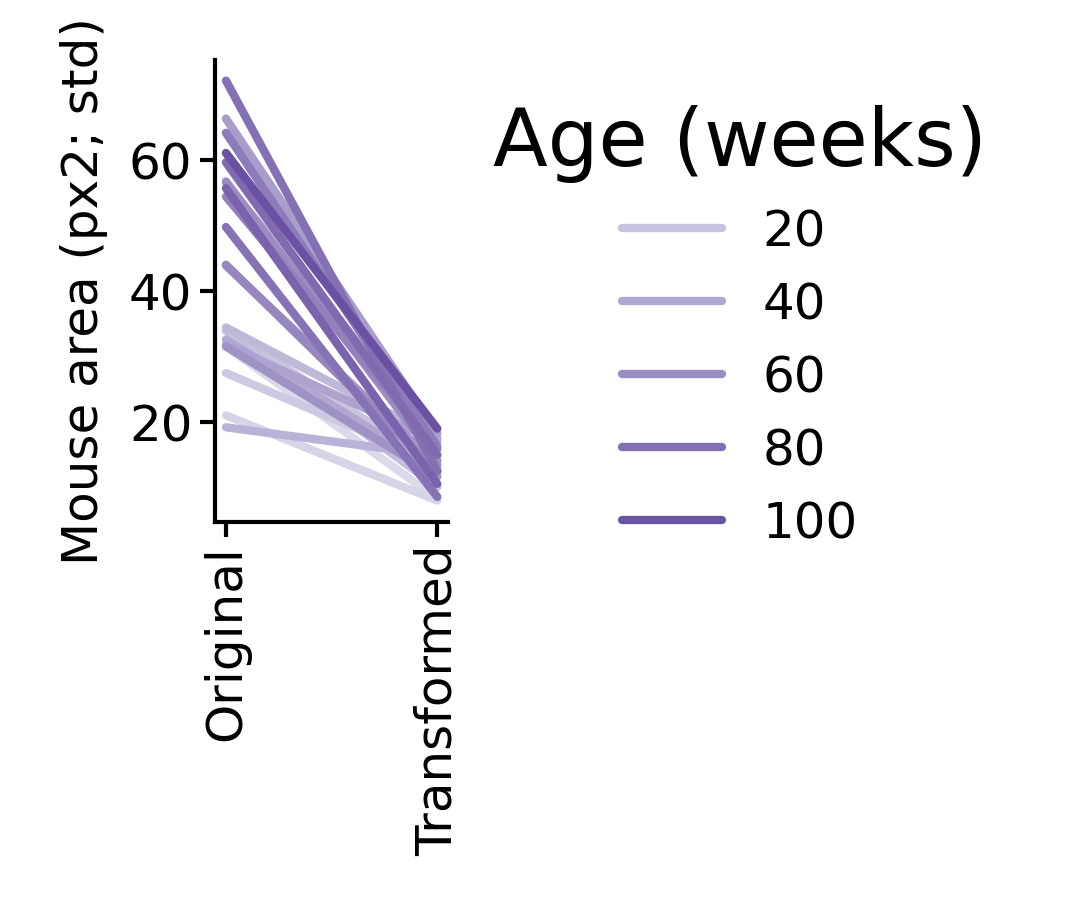

In [14]:
fig = figure(0.5, 1)
ax = sns.lineplot(
    data=ex, x="variable", y="value", hue="age", palette=ONTOGENY_AGE_CMAP
)
ax.set(ylabel="Mouse area (px2; std)", xlabel="", xticklabels=["Original", "Transformed"])
plt.xticks(rotation=90)
legend(ax, title="Age (weeks)")
sns.despine()
saver(fig, "intra-age-area-variability");

In [15]:
ex = means[['rescaled_area_px', 'recon_area']].reset_index().melt(id_vars='age')

In [16]:
mu = np.sqrt(means[['rescaled_area_px', 'recon_area']]) 

In [17]:
mu / mu.loc[12]

,rescaled_area_px,recon_area
age,,
4,0.836235,0.991594
8,0.927977,1.010379
12,1.000000,1.000000
16,1.003559,1.010679
20,1.023806,1.009538
24,1.051902,1.003693
28,1.033029,0.998300
32,1.048865,1.004237
36,1.078606,1.005987


/tmp/ipykernel_2530/1922211295.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(ylabel="Mouse area (px2; mean)", xlabel="", xticklabels=["Original", "Transformed"])


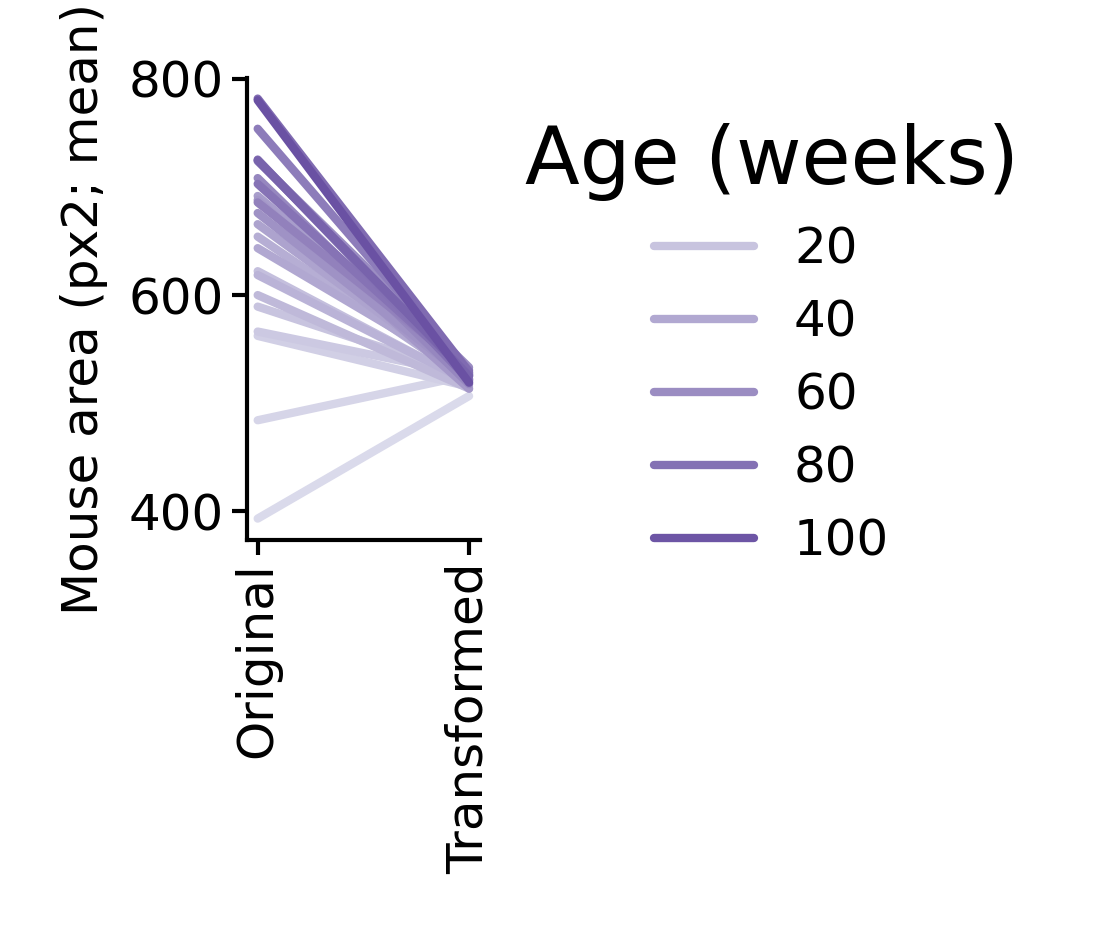

In [18]:
fig = figure(0.5, 1)
ax = sns.lineplot(
    data=ex, x="variable", y="value", hue="age", palette=ONTOGENY_AGE_CMAP
)
ax.set(ylabel="Mouse area (px2; mean)", xlabel="", xticklabels=["Original", "Transformed"])
plt.xticks(rotation=90)
legend(ax, title="Age (weeks)")
sns.despine()
saver(fig, "intra-age-area-mean");